In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\rhtho\Documents\CareerFoundry\Data Immersion\Achievement 6\07-2023 US Accidents analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'FatalCrashes.csv'))

In [3]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'StateYear', 'Weather',
       'Drinking', 'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds',
       'Persons', 'Fatals', 'Crash_fatality_rate'],
      dtype='object')

In [4]:
df['Year'].value_counts(dropna=False)

2021    39508
2020    35935
2017    34560
2018    33919
2019    33487
Name: Year, dtype: int64

In [5]:
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [6]:
df.describe()

,Year,Hour,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals
count,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000
mean,2019.067144,13.623091,0.302905,0.193665,0.122609,0.387179,0.237694,1.579965,0.229673,2.228884,1.085678
std,1.435006,10.149008,0.459516,0.395171,0.327989,0.487106,0.425672,0.883519,0.475665,1.756138,0.350283
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,2019.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,2020.000000,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000
max,2021.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,23.000000,133.000000,20.000000


In [9]:
df[df['Hour']>24].value_counts(dropna=False).sum()

1336

In [10]:
df[df['Hour']>24]

,ID,Date,Year,Day,Hour,State,StateYear,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate
293,2017-10185,2017-03-05,2017,Sunday,99,Alabama,Alabama2017,0,0,0,1,0,1,0,1,1,1
332,2017-10224,2017-04-14,2017,Friday,99,Alabama,Alabama2017,1,0,0,0,0,1,0,1,1,1
634,2017-10527,2017-08-20,2017,Sunday,99,Alabama,Alabama2017,1,0,0,1,1,1,0,1,1,1
731,2017-10624,2017-10-02,2017,Monday,99,Alabama,Alabama2017,0,0,0,0,0,1,1,1,1,1
5254,2017-131330,2017-12-01,2017,Friday,99,Georgia,Georgia2017,1,0,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176447,2021-63990,2021-05-18,2021,Tuesday,99,California,California2021,0,1,1,1,0,1,0,1,1,1
176483,2021-64027,2021-11-20,2021,Saturday,99,California,California2021,1,1,0,0,0,1,0,1,1,1
177405,2021-90301,2021-07-21,2021,Wednesday,99,Connecticut,Connecticut2021,0,0,0,0,0,1,1,0,1,#DIV/0!
177406,2021-90302,2021-05-14,2021,Friday,99,Connecticut,Connecticut2021,0,0,0,0,0,1,1,1,1,1


In [12]:
median = df.loc[df['Hour']<=24, 'Hour'].median()
df['Hour'] = np.where(df['Hour'] >24, median,df['Hour'])

In [13]:
df[df['Hour']>24]

,ID,Date,Year,Day,Hour,State,StateYear,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate


In [14]:
df.isnull().sum()

ID                     0
Date                   0
Year                   0
Day                    0
Hour                   0
State                  0
StateYear              0
Weather                0
Drinking               0
Drugs                  0
No_Seatbelt            0
Pickup                 0
Veh_Tot                0
Peds                   0
Persons                0
Fatals                 0
Crash_fatality_rate    0
dtype: int64

In [15]:
df[df.duplicated()]

,ID,Date,Year,Day,Hour,State,StateYear,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate


In [16]:
pop = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'State populations.csv'))

In [17]:
pop.columns

Index(['State', 'Year', 'Fatal_tot', 'Fatal_crash_tot', 'State_pop'], dtype='object')

In [18]:
for col in pop.columns.tolist():
  weird = (pop[[col]].applymap(type) != pop[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (pop[weird]) > 0:
    print (col)

In [19]:
pop.describe()

,Year,Fatal_tot,Fatal_crash_tot,State_pop
count,255.000000,255.000000,255.000000,2.550000e+02
mean,2019.000000,755.329412,695.721569,6.444924e+06
std,1.416995,846.005753,777.776579,7.297987e+06
min,2017.000000,23.000000,22.000000,5.776010e+05
25%,2018.000000,231.500000,211.000000,1.789242e+06
50%,2019.000000,558.000000,522.000000,4.467673e+06
75%,2020.000000,981.000000,907.500000,7.473616e+06
max,2021.000000,4498.000000,4068.000000,3.951222e+07


In [21]:
pop.isnull().sum()

State              0
Year               0
Fatal_tot          0
Fatal_crash_tot    0
State_pop          0
dtype: int64

In [20]:
pop[pop.duplicated()]

,State,Year,Fatal_tot,Fatal_crash_tot,State_pop


In [22]:
dt = pd.merge(df,pop)

In [23]:
dt.head()

,ID,Date,Year,Day,Hour,State,StateYear,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate,Fatal_tot,Fatal_crash_tot,State_pop
0,2017-100001,2017-01-04,2017,Wednesday,8.0,Delaware,Delaware2017,1,0,0,0,0,1,1,1,1,1,119,112,956823
1,2017-100002,2017-02-05,2017,Sunday,0.0,Delaware,Delaware2017,0,1,0,0,0,1,0,1,1,1,119,112,956823
2,2017-100003,2017-01-23,2017,Monday,14.0,Delaware,Delaware2017,1,0,0,0,1,2,0,2,1,0.5,119,112,956823
3,2017-100004,2017-01-30,2017,Monday,6.0,Delaware,Delaware2017,1,0,0,0,0,1,1,1,1,1,119,112,956823
4,2017-100005,2017-02-04,2017,Saturday,0.0,Delaware,Delaware2017,0,1,1,1,0,1,0,1,1,1,119,112,956823


In [24]:
dt.shape

(177409, 20)

In [25]:
dt.isnull().sum()

ID                     0
Date                   0
Year                   0
Day                    0
Hour                   0
State                  0
StateYear              0
Weather                0
Drinking               0
Drugs                  0
No_Seatbelt            0
Pickup                 0
Veh_Tot                0
Peds                   0
Persons                0
Fatals                 0
Crash_fatality_rate    0
Fatal_tot              0
Fatal_crash_tot        0
State_pop              0
dtype: int64

In [26]:
dt[dt.duplicated()]

,ID,Date,Year,Day,Hour,State,StateYear,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate,Fatal_tot,Fatal_crash_tot,State_pop


In [27]:
dt.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'StateYear', 'Weather',
       'Drinking', 'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds',
       'Persons', 'Fatals', 'Crash_fatality_rate', 'Fatal_tot',
       'Fatal_crash_tot', 'State_pop'],
      dtype='object')

In [28]:
dt = dt.drop(columns=['StateYear'])

In [30]:
dt[dt['State']=='Alabama']['State_pop'].value_counts(dropna=False)

5049846    885
4887681    876
4874486    864
4903185    856
5031362    852
Name: State_pop, dtype: int64

In [31]:
dt.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_clean_crashes.csv'))

## EDA

In [2]:
path = r'C:\Users\rhtho\Documents\CareerFoundry\Data Immersion\Achievement 6\07-2023 US Accidents analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean_crashes.csv'))

In [3]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'Weather', 'Drinking',
       'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds', 'Persons',
       'Fatals', 'Crash_fatality_rate', 'Fatal_tot', 'Fatal_crash_tot',
       'State_pop'],
      dtype='object')

### Heatmap

In [4]:
df.dtypes

ID                      object
Date                    object
Year                     int64
Day                     object
Hour                     int64
State                   object
Weather                  int64
Drinking                 int64
Drugs                    int64
No_Seatbelt              int64
Pickup                   int64
Veh_Tot                  int64
Peds                     int64
Persons                  int64
Fatals                   int64
Crash_fatality_rate    float64
Fatal_tot                int64
Fatal_crash_tot          int64
State_pop                int64
dtype: object

In [5]:
df.describe()

,Year,Hour,Weather,Drinking,Drugs,No_Seatbelt,Pickup,Veh_Tot,Peds,Persons,Fatals,Crash_fatality_rate,Fatal_tot,Fatal_crash_tot,State_pop
count,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,177409.000000,1.774090e+05
mean,2019.067144,12.982988,0.302905,0.193665,0.122609,0.387179,0.237694,1.579965,0.229673,2.228884,1.085678,0.578900,1697.257101,1561.821074,1.398634e+07
std,1.435006,6.906596,0.459516,0.395171,0.327989,0.487106,0.425672,0.883519,0.475665,1.756138,0.350283,0.286834,1356.281526,1243.079178,1.168808e+07
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.016393,23.000000,22.000000,5.776010e+05
25%,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.333333,693.000000,638.000000,5.131848e+06
50%,2019.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.500000,1059.000000,973.000000,9.986857e+06
75%,2020.000000,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,3185.000000,2952.000000,2.147774e+07
max,2021.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,23.000000,133.000000,20.000000,1.000000,4498.000000,4068.000000,3.951222e+07


In [6]:
sub_heat = df[['Crash_fatality_rate','Weather','Drinking','Drugs','No_Seatbelt','Pickup','Veh_Tot','Peds','Persons','Fatals']]

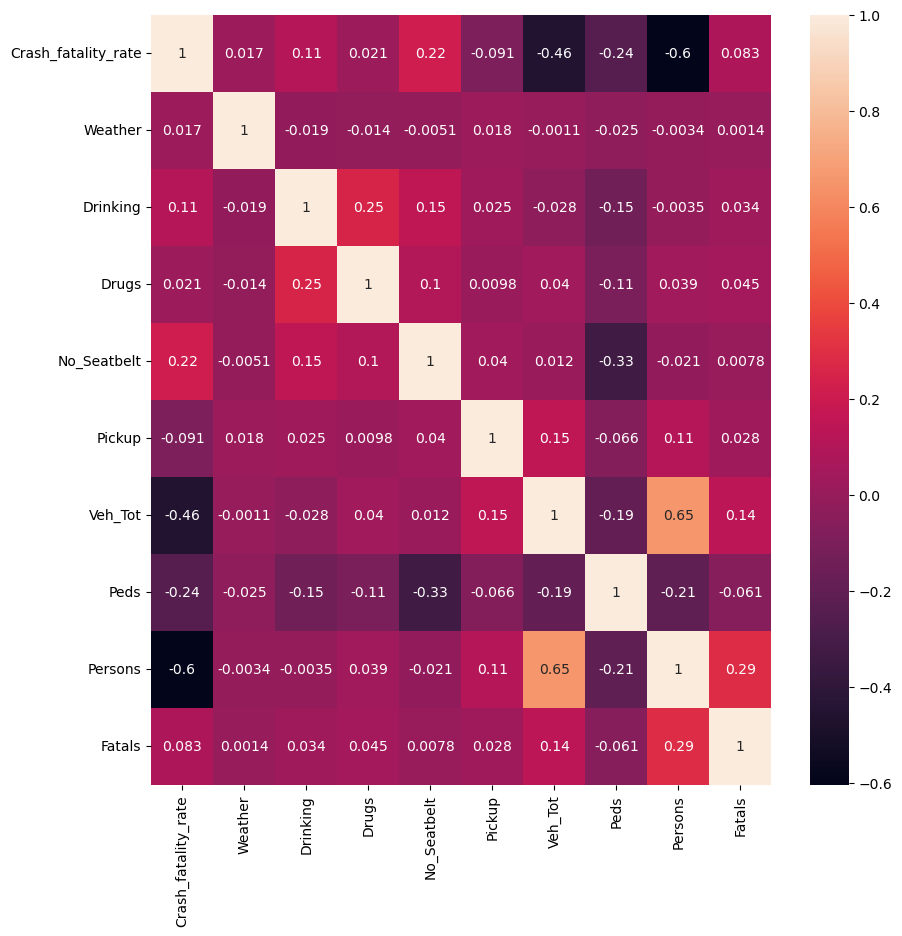

In [7]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub_heat.corr(), annot = True, ax = ax)

In [8]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7
big = df[dev]
small = df[~dev]

In [9]:
small_sub = small[['Crash_fatality_rate','Weather','Drinking','Drugs','No_Seatbelt','Pickup','Veh_Tot','Peds','Persons','Fatals']]

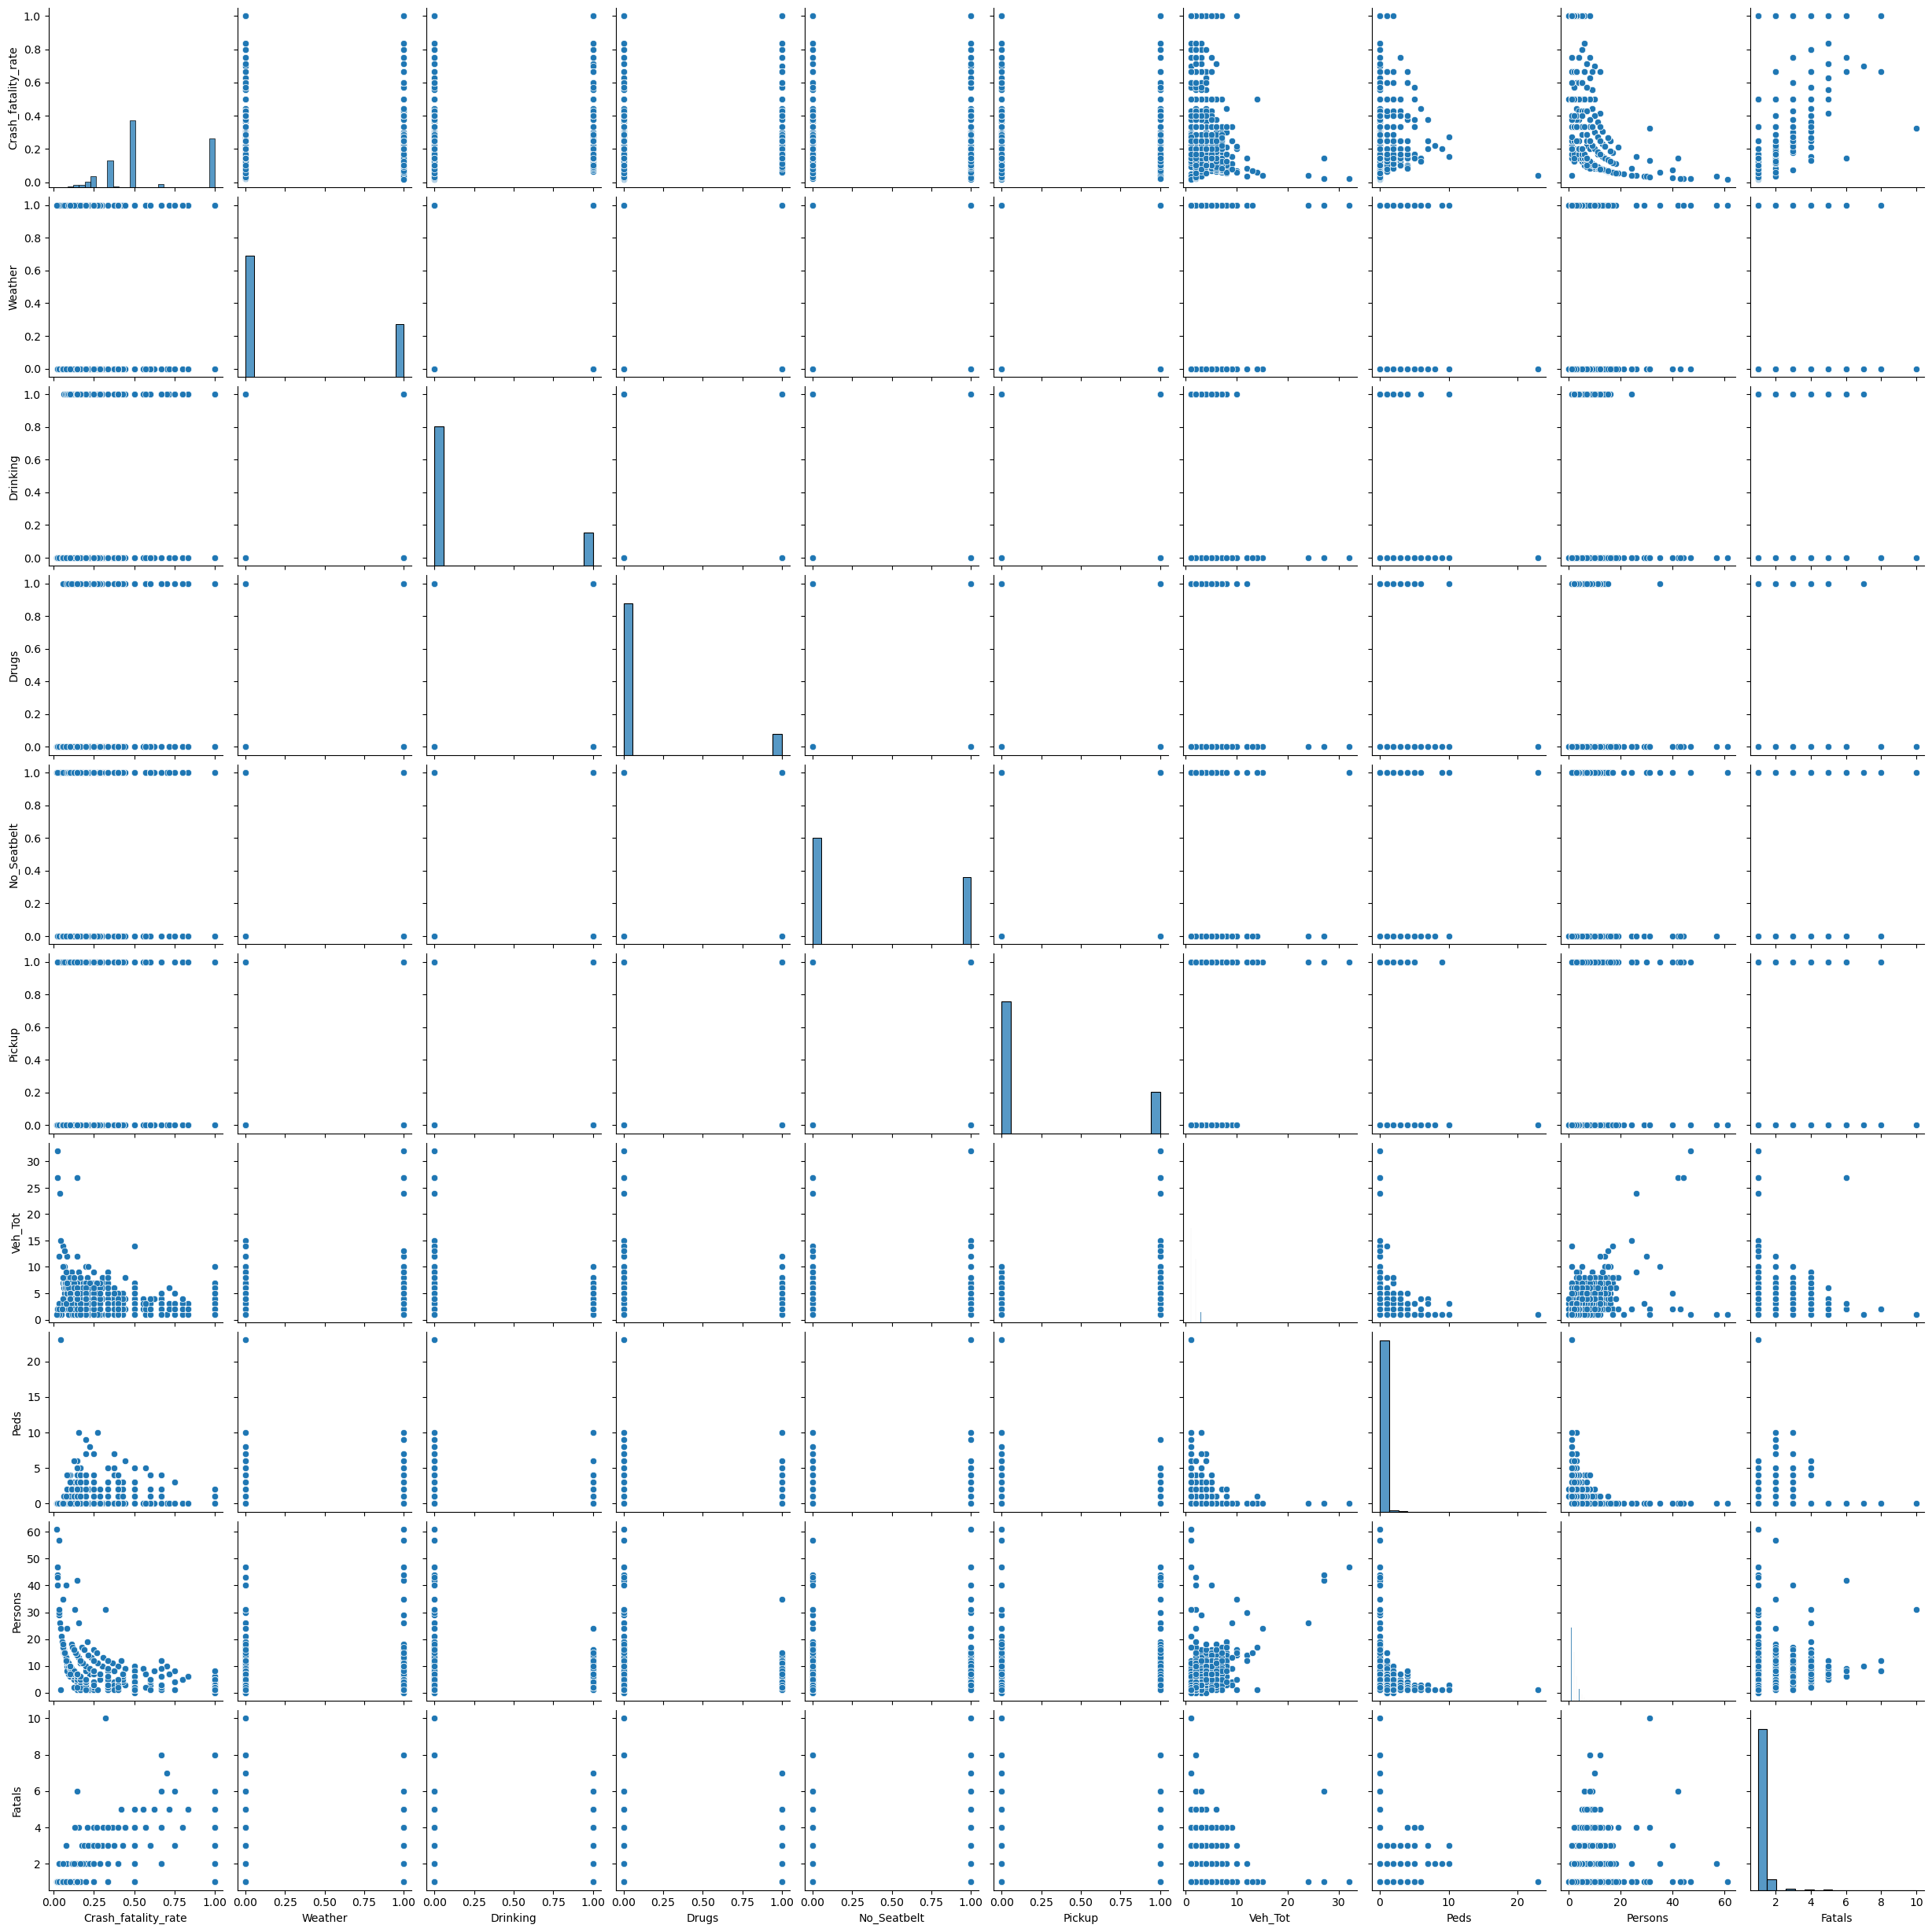

In [10]:
sns.pairplot(small_sub)

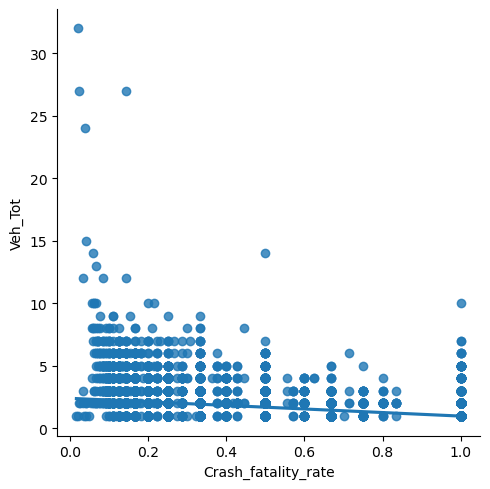

In [16]:
sns.lmplot(x = 'Crash_fatality_rate', y = 'Veh_Tot', data = small)

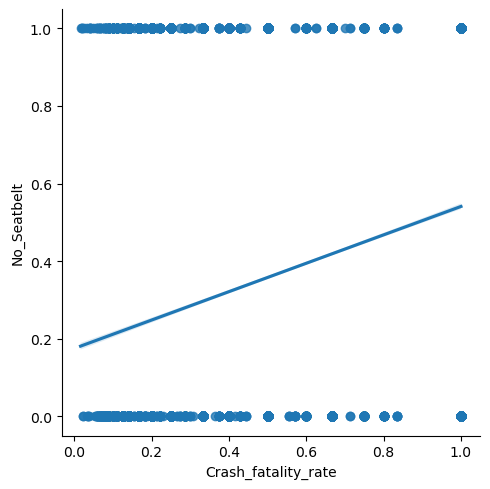

In [17]:
sns.lmplot(x = 'Crash_fatality_rate', y = 'No_Seatbelt', data = small)

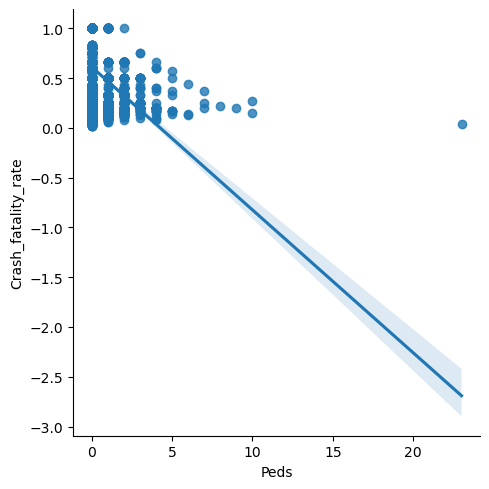

In [13]:
sns.lmplot(x = 'Peds', y = 'Crash_fatality_rate', data = small)

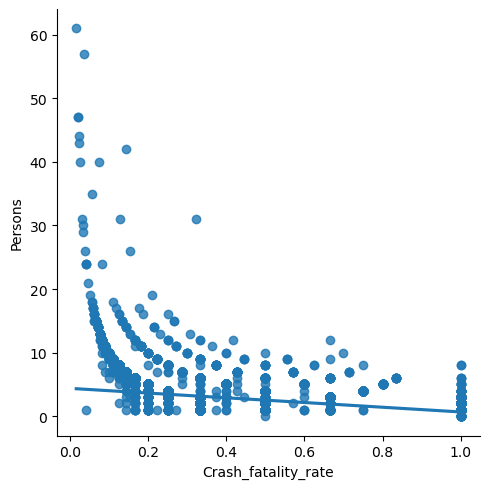

In [15]:
sns.lmplot(x = 'Crash_fatality_rate', y = 'Persons', data = small)

<Axes: xlabel='Crash_fatality_rate', ylabel='Count'>

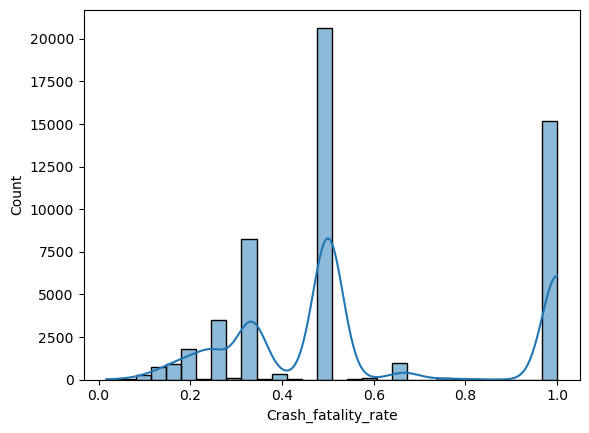

In [18]:
sns.histplot(small['Crash_fatality_rate'], bins = 30, kde = True)

In [19]:
df['Peds'].sum()

40746

In [20]:
df.shape

(177409, 19)

## K-Means Clustering

In [3]:
from sklearn.cluster import KMeans
import pylab as pl
%matplotlib inline

In [4]:
dfnum = df[['Crash_fatality_rate','Weather','Drinking','Drugs','No_Seatbelt','Pickup','Veh_Tot','Peds','Persons','Fatals']]

In [5]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [6]:
score = [kmeans[i].fit(dfnum).score(dfnum) for i in range(len(kmeans))]
score

C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\clust

[-920608.5671335561,
 -587789.8536768084,
 -475407.2034472169,
 -415974.7589942435,
 -384868.3489056359,
 -337173.2674751254,
 -313542.10798590956,
 -304631.8383560411,
 -283200.6118169674]

Text(0.5, 1.0, 'Elbow Curve')

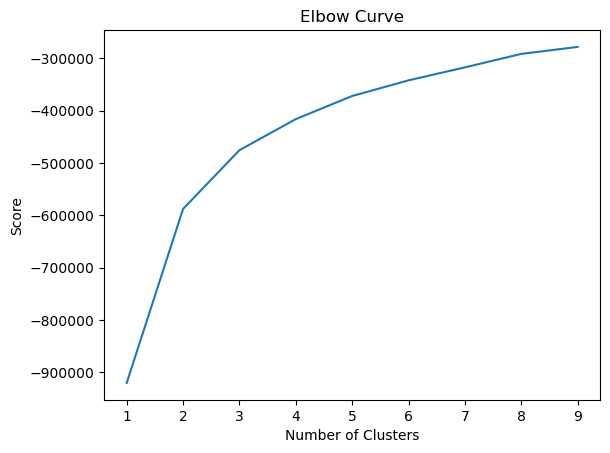

In [39]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

In [7]:
kmeans = KMeans(n_clusters = 3) 

In [8]:
kmeans.fit(dfnum)

C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
dfnum['clusters'] = kmeans.fit_predict(dfnum)

C:\Users\rhtho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhtho\AppData\Local\Temp\ipykernel_5856\754461545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum['clusters'] = kmeans.fit_predict(dfnum)


In [10]:
dfnum['clusters'].value_counts()

2    91156
0    71474
1    14779
Name: clusters, dtype: int64

In [44]:
# Take sample to improve readability of graph
np.random.seed(4)
dev = np.random.rand(len(dfnum)) <= 0.7
big = dfnum[dev]
small = dfnum[~dev]

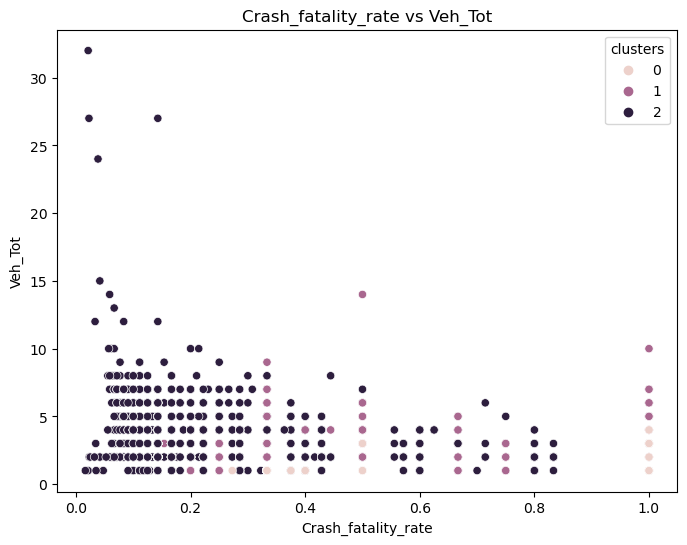

In [45]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=small['Crash_fatality_rate'], y=small['Veh_Tot'], hue=small['clusters']) 
ax.grid(False)
plt.xlabel('Crash_fatality_rate')
plt.ylabel('Veh_Tot')
plt.title('Crash_fatality_rate vs Veh_Tot')
plt.show()

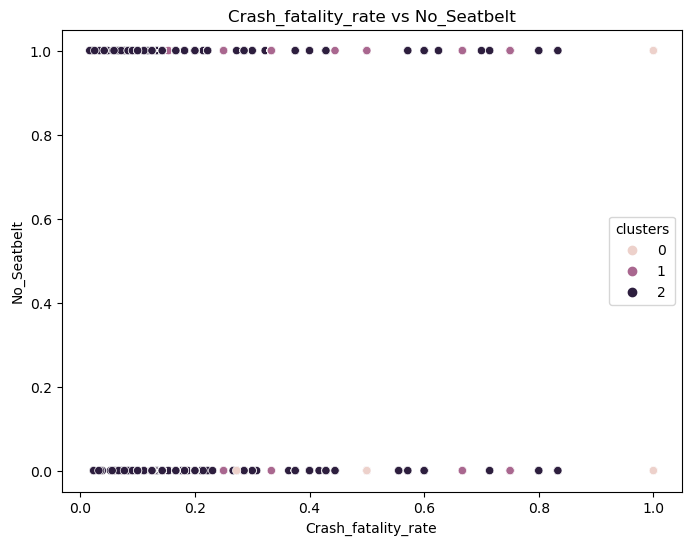

In [46]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=small['Crash_fatality_rate'], y=small['No_Seatbelt'], hue=small['clusters']) 
ax.grid(False)
plt.xlabel('Crash_fatality_rate')
plt.ylabel('No_Seatbelt')
plt.title('Crash_fatality_rate vs No_Seatbelt')
plt.show()

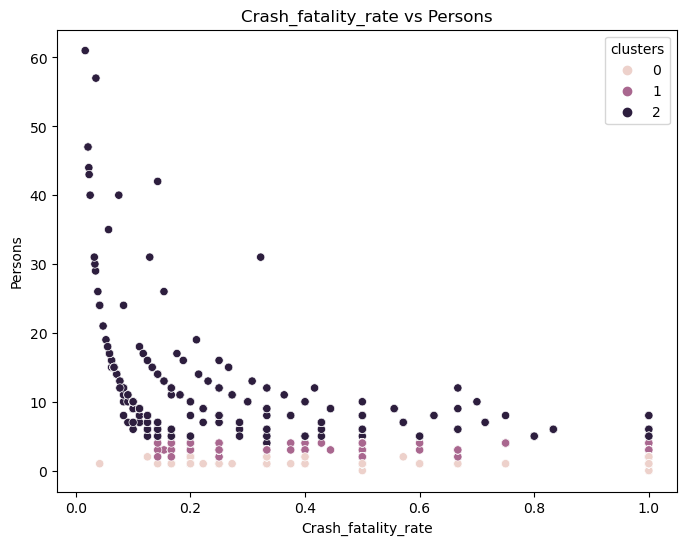

In [47]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=small['Crash_fatality_rate'], y=small['Persons'], hue=small['clusters']) 
ax.grid(False)
plt.xlabel('Crash_fatality_rate')
plt.ylabel('Persons')
plt.title('Crash_fatality_rate vs Persons')
plt.show()

In [11]:
df.loc[dfnum['clusters'] == 2, 'cluster'] = '2'
df.loc[dfnum['clusters'] == 1, 'cluster'] = '1'
df.loc[dfnum['clusters'] == 0, 'cluster'] = '0'

In [12]:
df.groupby('cluster').agg({'Persons':['mean', 'median'], 'Veh_Tot':['mean', 'median'], 'Crash_fatality_rate':['mean', 'median'], 'No_Seatbelt':['mean', 'median'],'Peds':['mean', 'median']})

Persons          Veh_Tot        Crash_fatality_rate         \
             mean median      mean median                mean median   
cluster                                                                
0        2.708230    3.0  2.042043    2.0            0.425958    0.5   
1        6.373638    6.0  2.726436    2.0            0.222099    0.2   
2        1.181052    1.0  1.031781    1.0            0.756668    1.0   

        No_Seatbelt             Peds         
               mean median      mean median  
cluster                                      
0          0.415340    0.0  0.074657    0.0  
1          0.341160    0.0  0.068137    0.0  
2          0.372559    0.0  0.377408    0.0

## Time Series Analysis

In [50]:
import statsmodels.api as sm

In [51]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'Weather', 'Drinking',
       'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds', 'Persons',
       'Fatals', 'Crash_fatality_rate', 'Fatal_tot', 'Fatal_crash_tot',
       'State_pop', 'cluster'],
      dtype='object')

In [97]:
# Subset
dfsub = df[['Date','Fatals']]

In [98]:
dfsub = dfsub.reset_index()
dfsub.drop(['index'], axis=1, inplace=True)
dfsub.head()

,Date,Fatals
0,1/4/2017,1
1,2/5/2017,1
2,1/23/2017,1
3,1/30/2017,1
4,2/4/2017,1


In [99]:
dfsub = dfsub.groupby(pd.PeriodIndex(dfsub['Date'], freq="M"))['Fatals'].sum()

In [100]:
dfsub = dfsub.reset_index()
dfsub.head()

,Date,Fatals
0,2017-01,2845
1,2017-02,2528
2,2017-03,2928
3,2017-04,2993
4,2017-05,3188


In [101]:
from datetime import datetime
dfsub['Date'] = dfsub['Date'].dt.strftime('%Y-%m')
dfsub.head()

,Date,Fatals
0,2017-01,2845
1,2017-02,2528
2,2017-03,2928
3,2017-04,2993
4,2017-05,3188


In [102]:
dfsub = dfsub.set_index('Date')
dfsub.sort_index(inplace=True)
dfsub.head()

,Fatals
Date,
2017-01,2845
2017-02,2528
2017-03,2928
2017-04,2993
2017-05,3188


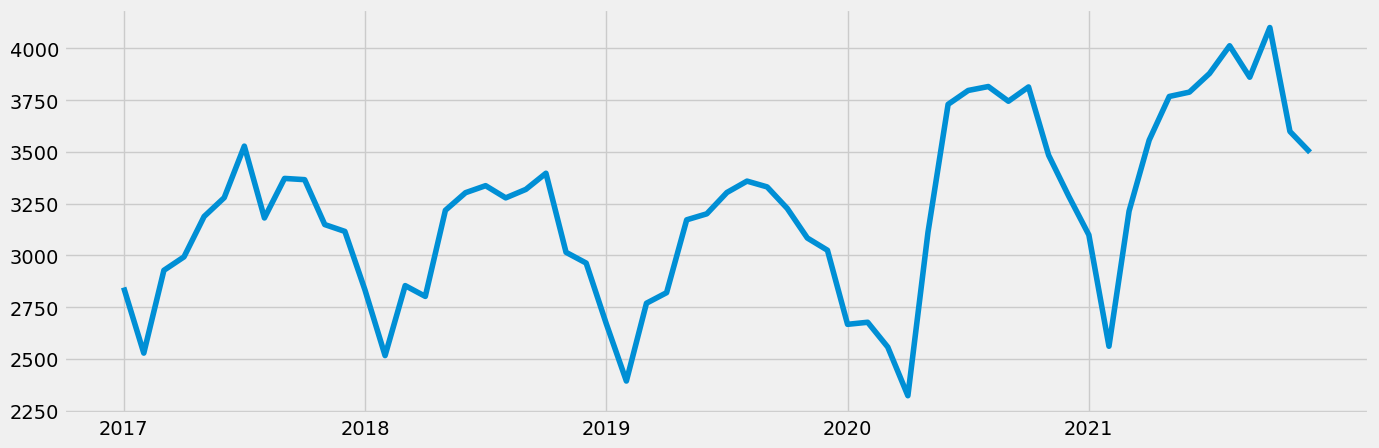

In [103]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(dfsub)
ax.set_xticks(dfsub.index[::12])
ax.set_xticklabels(dfsub.index[::12].str[:4])
plt.show()

### Time Series Analysis Decomposition

In [113]:
decomposition = sm.tsa.seasonal_decompose(dfsub, model='additive',period=5)

In [114]:
observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
dfdecomp = pd.DataFrame({"observed":observed, "trend":trend, "seasonal":seasonal,"residual":residual})

In [115]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

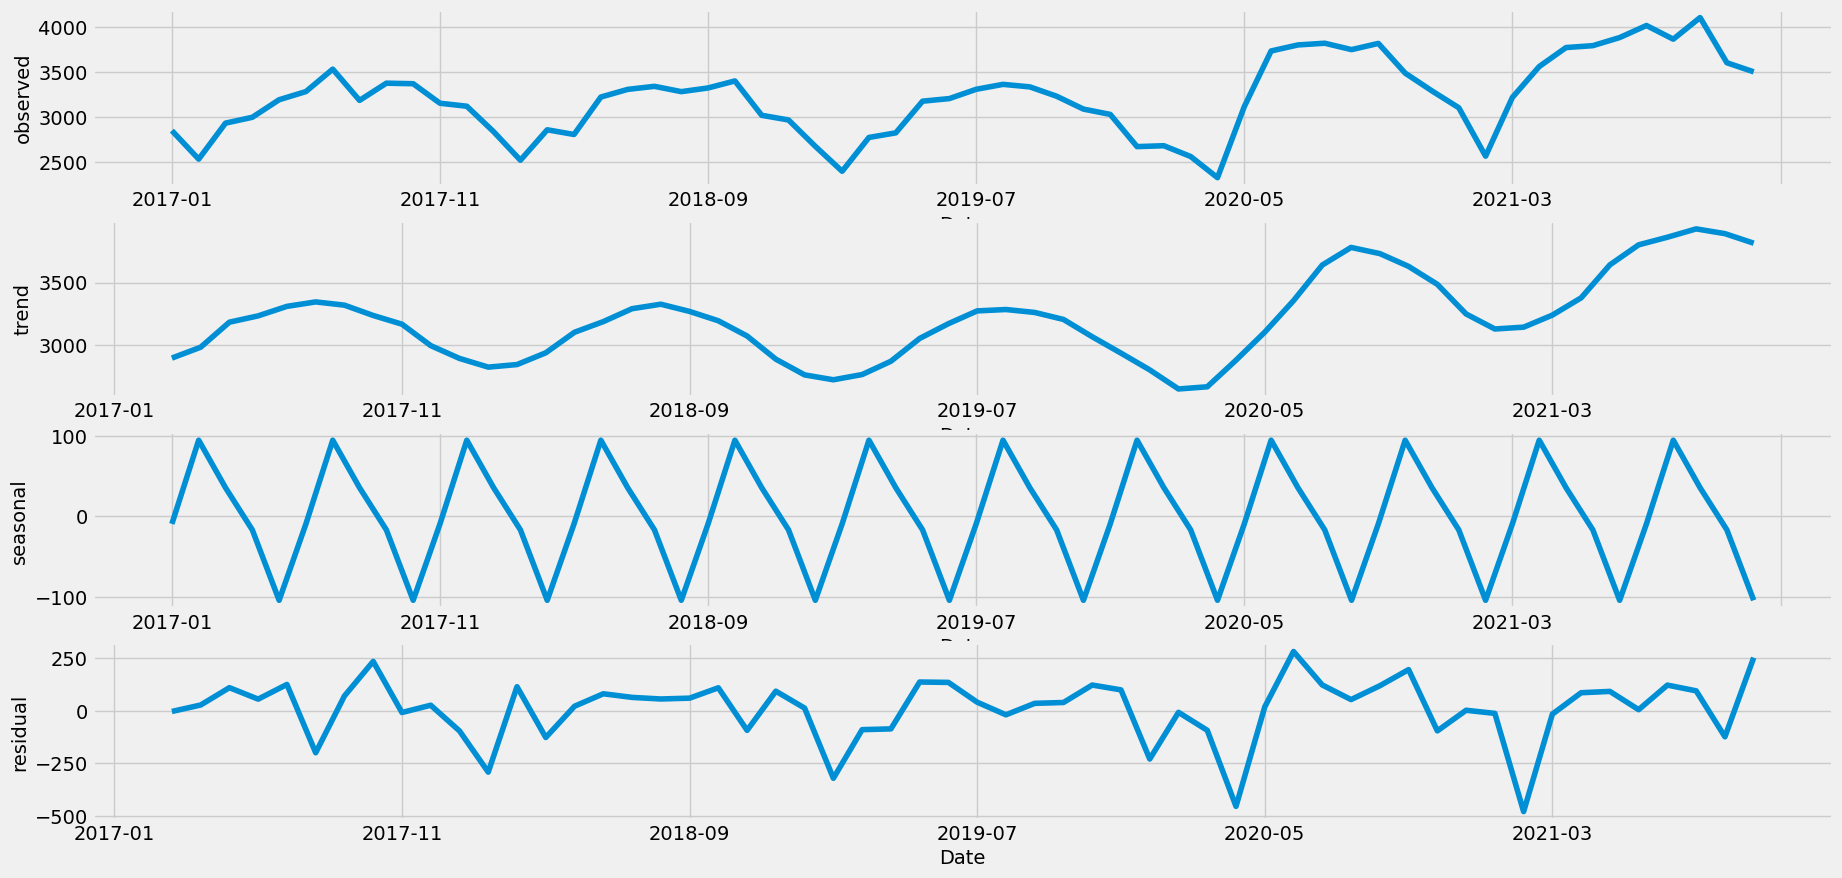

In [116]:
import matplotlib.dates as mdates
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y-%m')

_, axes = plt.subplots(nrows=4,ncols=1, figsize=(20, 10))
for i, ax in enumerate(axes):
    ax = dfdecomp.iloc[:,i].plot(ax=ax)
    ax.set_ylabel(dfdecomp.iloc[:,i].name)

In [117]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(dfsub['Fatals'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.877709
p-value                         0.992792
Number of Lags Used             9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


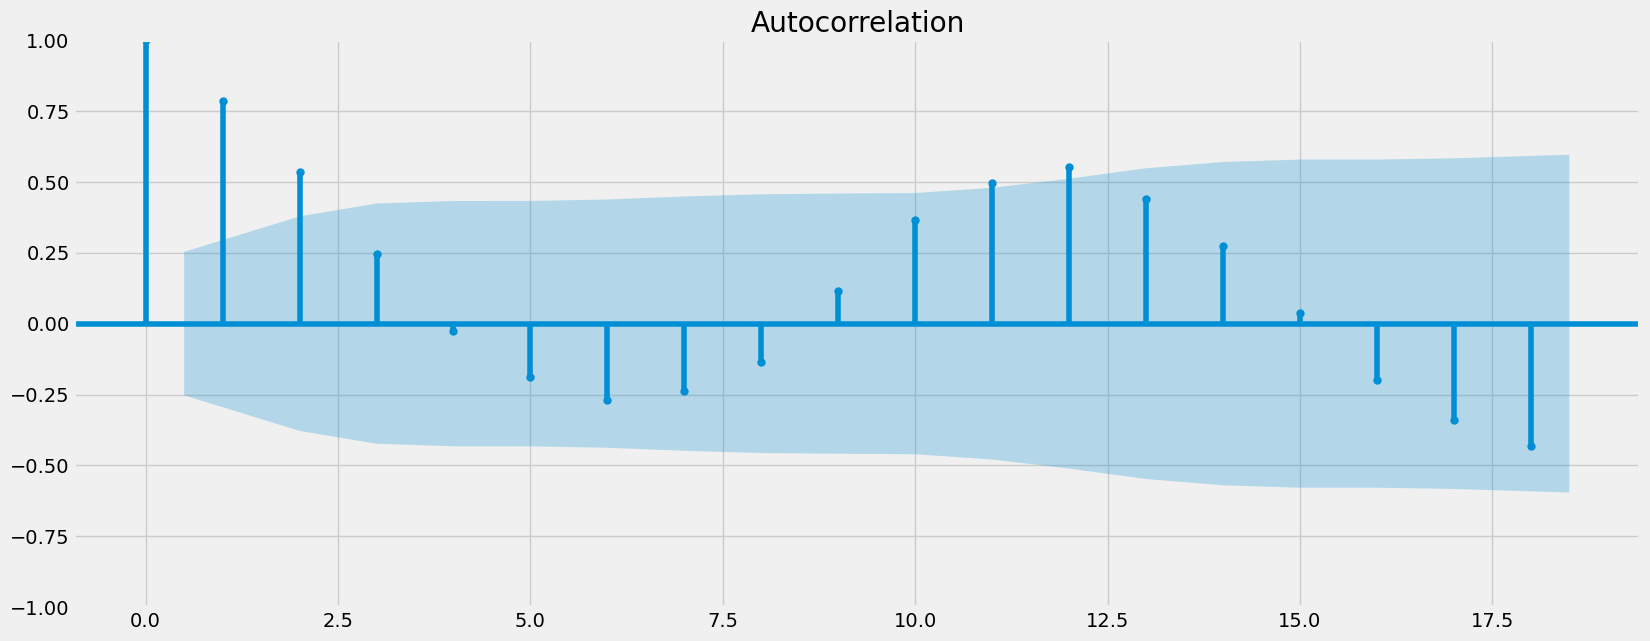

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dfsub)
plt.show()

In [119]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'Weather', 'Drinking',
       'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds', 'Persons',
       'Fatals', 'Crash_fatality_rate', 'Fatal_tot', 'Fatal_crash_tot',
       'State_pop', 'cluster'],
      dtype='object')

In [13]:
df.loc[df['cluster'] == '2', 'Occupants_involved'] = 'Low'
df.loc[df['cluster'] == '1', 'Occupants_involved'] = 'High'
df.loc[df['cluster'] == '0', 'Occupants_involved'] = 'Medium'

In [14]:
df.columns

Index(['ID', 'Date', 'Year', 'Day', 'Hour', 'State', 'Weather', 'Drinking',
       'Drugs', 'No_Seatbelt', 'Pickup', 'Veh_Tot', 'Peds', 'Persons',
       'Fatals', 'Crash_fatality_rate', 'Fatal_tot', 'Fatal_crash_tot',
       'State_pop', 'cluster', 'Occupants_involved'],
      dtype='object')

In [16]:
df = df.drop(columns=['cluster'])

In [17]:
df.isnull().sum()

ID                     0
Date                   0
Year                   0
Day                    0
Hour                   0
State                  0
Weather                0
Drinking               0
Drugs                  0
No_Seatbelt            0
Pickup                 0
Veh_Tot                0
Peds                   0
Persons                0
Fatals                 0
Crash_fatality_rate    0
Fatal_tot              0
Fatal_crash_tot        0
State_pop              0
Occupants_involved     0
dtype: int64

In [18]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_clean_crashes_final.csv'))